# EPR-type entanglement of NDPA

$$\def \lk{\left(}
\def \rk{\right)}
\def \frop#1{\hat{\tilde{#1}}}
\def\thetap{\theta^\prime}
\def\ul#1{\underline{#1}}
\def\frvecop#1{\hat{\tilde{\underline{#1}}}}
\def\dul#1{\underline{\underline{#1}}}
\def\frmat#1{\tilde{\dul{#1}}}
\def\lk{\left(}
\def\rk{\right)}
\def\lka{\left\{}
\def\rka{\right\}}
\def\lsz{\left[}
\def\rsz{\right]}$$

## Intracavity field
$$\begin{align}
\hat{\tilde{\ul{a}}} &= - \left(\nu\dul{\mathbb{1}} - \dul{\Delta} - 
\sqrt{2\pi}\tilde{\dul{f}}\right)^{-1} \hat{\tilde{\ul{B}}} = 
\tilde{\dul{N}}\ \hat{\tilde{\ul{B}}}\\
\dul{\Delta} &= \left(\begin{matrix} 
-(\kappa_a+i\Delta_a) & 0 & g & \epsilon \\
0 & -(\kappa_a-i\Delta_a) & \epsilon^* & g^* \\
-g^* & \epsilon & -(\kappa_b+i\Delta_b) & 0 \\
\epsilon^* & -g & 0 & -(\kappa_b-i\Delta_b)\end{matrix}\right)\\
\sqrt{2\pi}\frmat{f} &= diag \left(k_ae^{i(\nu\tau_a+\phi_a)},k_ae^{i(\nu\tau_a-\phi_a)},k_be^{i(\nu\tau_b+\phi_b)},k_be^{i(\nu\tau_b-\phi_b)}\right)
%\frvecop{a} & = -i \lk\begin{matrix}
%\frac{1}{\Lambda_{ab}}\lk\sqrt{2\kappa_a}d_{-b}\frop{a}_{in}+\sqrt{2\kappa_b}\epsilon\frop{b}^\dagger_{in}\rk\\
%\frac{1}{\Lambda_{ba}}\lk\sqrt{2\kappa_a}d_{+b}\frop{a}^\dagger_{in}+\sqrt{2\kappa_b}\epsilon^*\frop{b}_{in}\rk\\
%\frac{1}{\Lambda_{ba}}\lk\sqrt{2\kappa_a}\epsilon\frop{a}^\dagger_{in}+\sqrt{2\kappa_b}d_{-b}\frop{b}_{in}\rk\\
%\frac{1}{\Lambda_{ab}}\lk\sqrt{2\kappa_a}\epsilon^*\frop{a}_{in}+\sqrt{2\kappa_b}d_{+b}\frop{b}^\dagger_{in}\rk\end{matrix}\rk\\
\end{align}$$

### Input field
$$\begin{align}
\frvecop{B} &= -i\lsz\dul{\kappa}_1^{-1}\lk\dul{\kappa}_1^2+\sqrt{2\pi}\, \frmat{f}\rk\frvecop{a}_{1,in} + \dul{\kappa}_2\dul{L}_1\frvecop{\xi} \rsz = \frmat{A}\,\frvecop{a}_{1,in} + \dul{S}\,\frvecop{\xi}\\
\dul{\kappa}_n &= diag(\sqrt{2\kappa_{n,a}},\sqrt{2\kappa_{n,a}},\sqrt{2\kappa_{n,b}},\sqrt{2\kappa_{n,b}})\\
\dul{L}_1 &= diag(\sqrt{L_a},\sqrt{L_a},\sqrt{L_b},\sqrt{L_b})\\
\dul{L}_2 &= diag(\sqrt{1-L_a},\sqrt{1-L_a},\sqrt{1-L_b},\sqrt{1-L_b})\\
\end{align}$$
where $\frvecop{a}_{1,in}$ and $\frvecop{\xi}$ represent vacuum fields.\\
Therefore, the intracavity field has the following form:
$$\frvecop{a} = \frmat{N}\lk\frmat{A}\,\frvecop{a}_{1,in}+\dul{S}\,\frvecop{\xi}\rk$$

In [2]:
from sympy import *
import numpy as np
from IPython.display import display, Math, Latex
init_printing(use_unicode=True)

In [3]:
from sympy.assumptions.assume import global_assumptions
from sympy.solvers.solvers import check_assumptions

dma,dmb,dpa,dpb,eps,Lab,Lba = \
symbols('d_-a d_-b d_+a d_+b \epsilon \Lambda_ab \Lambda_ba')

ka,kb,ta,tb,phia,phib,La,Lb,kap1a,kap2a,kap1b,kap2b =\
symbols('k_a k_b \\tau_a \\tau_b \phi_a \phi_b L_a,L_b,\kappa_1a \kappa_2a \kappa_1b \kappa_2b')

xia,xida,xib,xidb,a1in,ad1in,b1in,bd1in,nu = \
symbols('\\xi_a \\xi^+_a \\xi_b \\xi^+_b a_1in a^+_1in b_1in b^+_1in \\nu')

kap1 = diag(sqrt(2*kap1a),sqrt(2*kap1a),sqrt(2*kap1b),sqrt(2*kap1b))
kap2 = diag(sqrt(2*kap2a),sqrt(2*kap2a),sqrt(2*kap2b),sqrt(2*kap2b))
L1   = diag(sqrt(La),sqrt(La),sqrt(Lb),sqrt(Lb))
L2   = diag(sqrt(1-La),sqrt(1-La),sqrt(1-Lb),sqrt(1-Lb))
ftil = diag(ka*exp(I*(nu*ta+phia)),ka*exp(I*(nu*ta-phia)),kb*exp(I*(nu*tb+phib)),kb*exp(I*(nu*tb-phib)))
ain  = Matrix([a1in,ad1in,b1in,bd1in])
xi   = Matrix([xia,xida,xib,xidb])

A    = kap1+kap1.inv()*ftil
S    = kap2*L1

N    = Matrix([[dmb/Lab,0,0,eps/Lab],[0,dpb/Lba,conjugate(eps)/Lba,0],\
              [0,eps/Lba,dma/Lba,0],[conjugate(eps)/Lab,0,0,dpa/Lab]])


The intracavity field is:

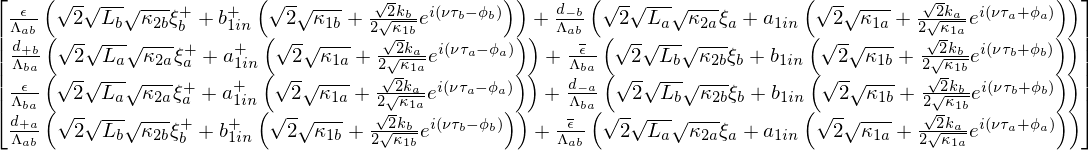

In [4]:
a = (N*(A*ain+S*xi))
a

So we have the following equations for the intracavity field:
$$\begin{align}
\frop{a}(\nu) &= \frac{1}{\Lambda_{ab}(\nu)}\lsz\frac{d_{-b}(\nu)}{\sqrt{2\kappa_{1,a}}}\lk 2 \kappa_{1,a}+k_a e^{i\lk\nu\tau_a+\phi_a\rk}\rk \frop{a}_{1,in}(\nu)+\right.\\
&\quad\left. \frac{\epsilon}{\sqrt{2\kappa_{1,b}}}\lk 2\kappa_{1,b} + k_b e^{i\lk\nu\tau_b-\phi_b\rk}\rk\frop{b}^\dagger_{1,in}(\nu)+\right.\\
&\quad\left. \sqrt{\kappa_{2,a}L_a}d_{-b}(\nu)\frop{\xi}_a(\nu) +  \sqrt{\kappa_{2,b}L_b}\epsilon\frop{\xi}^\dagger_b(-\nu) \rsz =\\
&=\frac{1}{\Lambda_{ab}(\nu)}\lsz d_{-b}(\nu) \alpha(\nu) \frop{a}_{1,in}(\nu)+\epsilon\beta^*(-\nu)\frop{b}^\dagger_{1,in}(-\nu)+\right.\\
&\quad\left. \sqrt{\kappa_{2,a}L_a}d_{-b}(\nu)\frop{\xi}_a(\nu) +  \sqrt{\kappa_{2,b}L_b}\epsilon\frop{\xi}^\dagger_b(-\nu) \rsz\\
\frop{a}^\dagger(-\nu) &=\frac{1}{\Lambda_{ba}(\nu)}\lsz d_{+b}(\nu) \alpha^*(-\nu) \frop{a}^\dagger_{1,in}(-\nu)+\epsilon^*\beta(\nu)\frop{b}_{1,in}(\nu)+\right.\\
&\quad\left. \sqrt{\kappa_{2,a}L_a}d_{+b}(\nu)\frop{\xi}^\dagger_a(-\nu) +  \sqrt{\kappa_{2,b}L_b}\epsilon^*\frop{\xi}_b(\nu) \rsz\\
\frop{b}(\nu) &=\frac{1}{\Lambda_{ba}(\nu)}\lsz \epsilon \alpha^*(-\nu) \frop{a}^\dagger_{1,in}(-\nu)+d_{-a}(\nu)\beta(\nu)\frop{b}_{1,in}(\nu)+\right.\\
&\quad\left. \sqrt{\kappa_{2,b}L_b}d_{-a}(\nu)\frop{\xi}_b(\nu) +  \sqrt{\kappa_{2,a}L_a}\epsilon\frop{\xi}^\dagger_a(-\nu) \rsz\\
\frop{b}^\dagger(-\nu) &=\frac{1}{\Lambda_{ab}(\nu)}\lsz \epsilon^* \alpha(\nu) \frop{a}_{1,in}(\nu)+d_{+a}(\nu)\beta^*(-\nu)\frop{b}^\dagger_{1,in}(-\nu)+\right.\\
&\quad\left. \sqrt{\kappa_{2,b}L_b}d_{+a}(\nu)\frop{\xi}^\dagger_b(-\nu) +  \sqrt{\kappa_{2,a}L_a}\epsilon^*\frop{\xi}_a(\nu) \rsz
\end{align}$$

### Output field
$$\begin{align}
\frvecop{a}_{2,out} &= \dul{\kappa}^{-1}\frvecop{B} + \frmat{\kappa}_2\frvecop{a} =\\
&=\lk\dul{\kappa}^{-1} + \dul{\kappa}_2\frmat{N}\rk\lk\frmat{A}\,\frvecop{a}_{1,in}+\dul{S}\,\frvecop{\xi}\rk
\end{align}$$

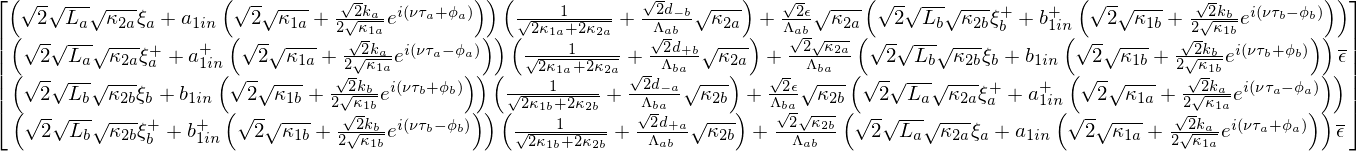

In [5]:
invkap = diag(1/sqrt(2*(kap1a+kap2a)),1/sqrt(2*(kap1a+kap2a)),1/sqrt(2*(kap1b+kap2b)),1/sqrt(2*(kap1b+kap2b)))
aout = (invkap+kap2*N)*(A*ain+S*xi)
aout

Therefore the output fields have the following expressions:
$$\begin{align}
\frop{a}_{2,out}(\nu) &= \lk\frac{1}{\sqrt{2\kappa_a}}+\sqrt{2\kappa_{2,a}}\frac{d_{-b}(\nu)}{\Lambda_{ab}(\nu)}\rk\lk\sqrt{2L_a\kappa_{2a}}\frop{\xi}_a(\nu)+\alpha(\nu)\frop{a}_{1,in}(\nu)\rk+\\
&\quad + \sqrt{2\kappa_{2,a}}\frac{\epsilon}{\Lambda_{ab}(\nu)}\lk\sqrt{2L_b\kappa_{2,b}}\frop{\xi}^\dagger_b(-\nu)+\beta^*(-\nu)\frop{b}^\dagger_{1,in}(t)\rk = \\
&= \frac{1}{\Lambda_{ab}(\nu)}\lsz \frac{D_a(\nu)}{\sqrt{2\kappa_a}}\alpha(\nu)\frop{a}_{1,in}(\nu)+\sqrt{2\kappa_{2,a}}\epsilon\beta^*(-\nu)\frop{b}^\dagger_{1,in}(-\nu)+\right.\\
&\quad\left.\sqrt{2L_a\kappa_{2,a}}\frac{D_a(\nu)}{\sqrt{2\kappa_a}}\frop{\xi}_a(\nu)+2\sqrt{\kappa_{2,a}\kappa_{2,b}L_b}\epsilon\frop{\xi}_b^\dagger(-\nu)\rsz\\
\frop{a}^\dagger_{2,out}(-\nu) &= \frac{1}{\Lambda_{ba}(\nu)}\lsz \frac{D_a^*(-\nu)}{\sqrt{2\kappa_{a}}}\alpha^*(-\nu)\frop{a}^\dagger_{1,in}(-\nu)+\sqrt{2\kappa_{2,a}}\epsilon^*\beta(\nu)\frop{b}_{1,in}(\nu)+\right.\\
&\quad\left.\sqrt{\frac{L_a\kappa_{2,a}}{\kappa_a}}D_a^*(-\nu)\frop{\xi}^\dagger_a(-\nu)+2\sqrt{L_b\kappa_{2,a}\kappa_{2,b}}\epsilon^*\frop{\xi}_b(\nu)\rsz\\
\frop{b}_{2,out}(\nu)&= \frac{1}{\Lambda_{ba}(\nu)}\lsz \frac{D_b(\nu)}{\sqrt{2\kappa_{b}}}\beta(\nu)\frop{b}_{1,in}(\nu)+\sqrt{2\kappa_{2,b}}\epsilon\alpha^*(-\nu)\frop{a}^\dagger_{1,in}(-\nu)+\right.\\
&\quad\left.\sqrt{\frac{L_b\kappa_{2,b}}{\kappa_b}}D_b(\nu)\frop{\xi}_b(\nu)+2\sqrt{L_a\kappa_{2,a}\kappa_{2,b}}\epsilon\frop{\xi}_a^\dagger(-\nu)\rsz\\
\frop{b}^\dagger_{2,out}(-\nu) &= \frac{1}{\Lambda_{ab}(\nu)}\lsz \frac{D_b^*(-\nu)}{\sqrt{2\kappa_{b}}}\beta^*(-\nu)\frop{b}^\dagger_{1,in}(-\nu)+\sqrt{2\kappa_{2,b}}\epsilon^*\alpha(\nu)\frop{a}_{1,in}(\nu)+\right.\\
&\quad\left.\sqrt{\frac{L_b\kappa_{2,b}}{\kappa_b}}D_b^*(-\nu)\frop{\xi}^\dagger_b(-\nu)+2\sqrt{L_a\kappa_{2,a}\kappa_{2,b}}\epsilon^*\frop{\xi}_a(\nu)\rsz\\
\end{align}$$

## Quadrature variances

The quadratures of the two modes are:
$$\frop{X}_{\mu,\theta^\prime_\mu}=\frac{1}{2}\lk\frop{\mu}e^{-i\thetap_\mu/2}+\frop{\mu}^\dagger e^{i\thetap_\mu/2}\rk$$
The generalized quadratures involve both modes:
$$\frop{X}^G_{\thetap} = \frac{1}{\sqrt{2}}\lk X_{a,\thetap_a}- X_{b,\thetap_b}\rk$$



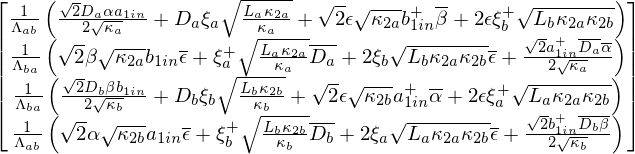

In [8]:
alpha,beta,Da,Db,thetapa,thetapb,kapa,kapb = symbols('\\alpha \\beta D_a D_b \\theta_pa \\theta_pb \kappa_a \kappa_b')
aout = Matrix([1/(Lab)*(Da/sqrt(2*kapa)*alpha*a1in+sqrt(2*kap2a)*eps*conjugate(beta)*bd1in+\
                        sqrt(La*kap2a/kapa)*Da*xia+2*sqrt(Lb*kap2a*kap2b)*eps*xidb),\
                        1/(Lba)*(conjugate(Da)/sqrt(2*kapa)*conjugate(alpha)*ad1in+sqrt(2*kap2a)*conjugate(eps)*beta*b1in+\
                                 sqrt(La*kap2a/kapa)*conjugate(Da)*xida+2*sqrt(Lb*kap2a*kap2b)*conjugate(eps)*xib),\
                        1/(Lba)*(Db/sqrt(2*kapb)*beta*b1in+sqrt(2*kap2b)*eps*conjugate(alpha)*ad1in+\
                                 sqrt(Lb*kap2b/kapb)*Db*xib+2*sqrt(La*kap2a*kap2b)*eps*xida),
                        1/(Lab)*(conjugate(Db)/sqrt(2*kapb)*conjugate(beta)*bd1in+sqrt(2*kap2b)*conjugate(eps)*alpha*a1in+\
                                 sqrt(Lb*kap2b/kapb)*conjugate(Db)*xidb+2*sqrt(La*kap2a*kap2b)*conjugate(eps)*xia)])
aout

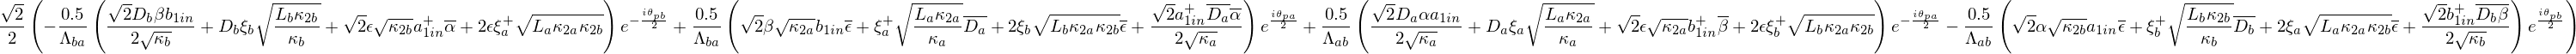

In [9]:
Xa = 1/2*(aout[0]*exp(-I*thetapa/2)+aout[1]*exp(I*thetapa/2))
Xb = 1/2*(aout[2]*exp(-I*thetapb/2)+aout[3]*exp(I*thetapb/2))
XG = 1/sqrt(2)*(Xa-Xb)
XG

So the expression of one of the quadratures is:
$$\begin{align}
\frop{X}_{\thetap}^G(\nu) &= \frac{\sqrt{2}}{4}\lka\frac{1}{\Lambda_{ab}}
\lsz \overbrace{\lk\frac{D_a(\nu)}{\sqrt{2\kappa_{a}}}e^{-i\thetap_a/2}-\sqrt{2\kappa_{2,b}}\epsilon^*e^{i\thetap_b/2}\rk}^{M_{a}(\nu)}\alpha(\nu)\frop{a}_{1,in}(\nu)-
\lk\frac{D^*_b(-\nu)}{\sqrt{2\kappa_{b}}}e^{i\thetap_b/2}-\sqrt{2\kappa_{2,a}}\epsilon e^{-i\thetap_a/2}\rk\beta^*(-\nu)\frop{b}^\dagger_{1,in}(-\nu)+\right.\right.\\
&\quad\left.\left.+\sqrt{2\kappa_{2a}L_a}\lk\frac{D_a(\nu)}{\sqrt{2\kappa_{a}}}e^{-i\thetap_a/2}-\sqrt{2\kappa_{2,b}}\epsilon^*e^{i\thetap_b/2}\rk\frop{\xi}_{a}(\nu)-
\sqrt{2\kappa_{2b}L_b}\lk\frac{D^*_b(-\nu)}{\sqrt{2\kappa_{b}}}e^{i\thetap_b/2}-\sqrt{2\kappa_{2,a}}\epsilon e^{-i\thetap_a/2}\rk\frop{\xi}^\dagger_{b}(-\nu)\rsz+\right.\\
&\quad\left.+\frac{1}{\Lambda_{ba}}
\lsz \lk\frac{D^*_a(-\nu)}{\sqrt{2\kappa_{a}}}e^{i\thetap_a/2}-\sqrt{2\kappa_{2,b}}\epsilon e^{-i\thetap_b/2}\rk\alpha^*(-\nu)\frop{a}^\dagger_{1,in}(-\nu)-
\lk\frac{D_b(\nu)}{\sqrt{2\kappa_{b}}}e^{-i\thetap_b/2}-\sqrt{2\kappa_{2,a}}\epsilon^* e^{i\thetap_a/2}\rk\beta(\nu)\frop{b}_{1,in}(\nu)+\right.\right.\\
&\quad\left.\left.\sqrt{2\kappa_{2a}L_a}\lk\frac{D^*_a(-\nu)}{\sqrt{2\kappa_{a}}}e^{i\thetap_a/2}-\sqrt{2\kappa_{2,b}}\epsilon e^{-i\thetap_b/2}\rk\frop{\xi}^\dagger_{a}(-\nu)-
\sqrt{2\kappa_{2b}L_b}\lk\frac{D_b(\nu)}{\sqrt{2\kappa_{b}}}e^{-i\thetap_b/2}-\sqrt{2\kappa_{2,a}}\epsilon^* e^{i\thetap_a/2}\rk\frop{\xi}_{b}(\nu)\rsz\rka=\\
&= \frac{\sqrt{2}}{4}\lka\frac{1}{\Lambda_{ab}}
\lsz M_{a}(\nu)\lk\alpha(\nu)\frop{a}_{1,in}(\nu)+\sqrt{2\kappa_{2a}L_a}\frop{\xi}_a(\nu)\rk- M_{b}^*(-\nu)\lk\beta^*(-\nu)\frop{b}^\dagger_{1,in}(-\nu)+\sqrt{2\kappa_{2b}L_b}\frop{\xi}_b^\dagger(-\nu)\rk\rsz+\right.\\
&\left.\quad+\frac{1}{\Lambda_{ba}}
\lsz M^*_{a}(-\nu)\lk\alpha^*(-\nu)\frop{a}^\dagger_{1,in}(-\nu)+\sqrt{2\kappa_{2a}L_a}\frop{\xi}^\dagger_a(-\nu)\rk- M_{b}(\nu)\lk\beta(\nu)\frop{b}_{1,in}(\nu)+\sqrt{2\kappa_{2b}L_b}\frop{\xi}_b(\nu)\rk\rsz\rka
\end{align}$$

## Numerical calculations

Here I set the appropriate parameters and calculate the general quadrature variance in the units of dB.

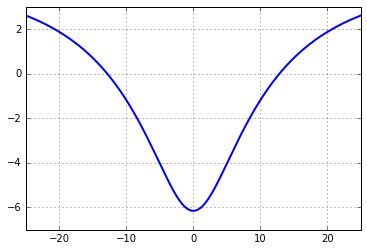

In [13]:
%matplotlib inline
import numpy as np
from pylab import *
import matplotlib.pyplot as pl

kapa=20*pi
Dela=0
ra=0.5
ta=0
phia=0
La=1
kapb=20*pi
Delb=0
rb=0.5
tb=0
phib=0
Lb=1
eps=20*pi
thetapa=-pi
thetapb=pi
#nu=0
nu = (np.arange(100001)/100001*50-25)*2*pi
kap2a = kapa * ra
kap2b = kapb * rb
kap1a = kapa * (1-ra)
kap1b = kapb * (1-rb)
ka = 2*sqrt(ra*(1-ra)*(1-La))*kapa
kb = 2*sqrt(rb*(1-rb)*(1-Lb))*kapb
dma = kapa+1j*(nu-Dela)-ka*np.exp(1j*(nu*ta-phia))
dmb = kapb+1j*(nu-Delb)-kb*np.exp(1j*(nu*tb-phib))
dpa = kapa+1j*(nu+Dela)-ka*np.exp(1j*(nu*ta+phia))
dpb = kapb+1j*(nu+Delb)-kb*np.exp(1j*(nu*tb+phib))
Lab = abs(eps)**2-dpa*dmb
Lba = abs(eps)**2-dpb*dma
alpha = 1/sqrt(2*kap2a)*(2*kap1a+ka*exp(1j*(nu*ta+phia)))
beta = 1/sqrt(2*kap2b)*(2*kap1b+kb*exp(1j*(nu*tb+phib)))
Da = Lab + 2*sqrt(kapa*kap2a)*dmb
Db = Lba + 2*sqrt(kapb*kap2b)*dma
Mpa = Da/sqrt(2*kapa)*exp(-1j*thetapa/2)-sqrt(2*kap2b)*conjugate(eps)*np.exp(1j*thetapb/2)
Mpb = Db/sqrt(2*kapb)*exp(-1j*thetapb/2)-sqrt(2*kap2a)*conjugate(eps)*exp(1j*thetapa/2)
XXG = sqrt(2)/(abs(Lab)**2)*(abs(Mpa)**2*(abs(alpha)**2+2*kap2a*La)+abs(Mpb)**2*(abs(beta)**2+2*kap2b*Lb))

#par = {kapa:20*pi.evalf(), Dela:0, ra:0.5, ta:0, phia:0, La:0,\
#       kapb:20*pi.evalf(), Delb:0, rb:0.5, tb:0, phib:0, Lb:0,\
#       eps:10*pi.evalf(), thetap:pi.evalf()}

Sout = 10*np.log10(XXG)
#sth = XXG.subs(par)
#sth2 = 10*log(sth)/log(10)
#f = lambdify(nu, sth2.evalf(), "numpy")
#pl.plot(nup,f(nup))
pl.plot(nu/2/pi,Sout,linewidth=2.0)
pl.grid(True)
pl.xlim(-25,25)

## Interactive plotting

In [ ]:
def quadr_spec(kappa,Delta,r,tau,phi,L,thetap,eps,nui,nuf,N):
    nu = linspace(nui,nuf,N)
    kappa2 = kappa*r
    kappa1 = kappa*(1-r)
    k = 2*sqrt(r*(1-r)*(1-L/100))*kappa
    dma = kappa + 1j*(nu-Delta)


## Singularities

If one calculates the quadrature variance $\left<\frop{X}^G_{\pm,\thetap}(\nu),\frop{X}^G_{\pm,\thetap}(\nu^\prime)\right>$, then the obtained expression has a singularity when $\left|\Lambda_{ab}\right|^2=0$. To find this condition, let us take a closer look at expression $\Lambda_{ab}$.
$$\begin{align}
\Lambda_{ab}(\nu) &= |\epsilon|^2-d_{+a}(\nu)d_{-b}(\nu) = |\epsilon|^2-\lk\kappa_a + i\lk\nu+\Delta_a\rk - k_a e^{i\lk\nu\tau_a+\phi_a\rk}\rk\lk\kappa_b + i\lk\nu-\Delta_b\rk - k_b e^{i\lk\nu\tau_b-\phi_b\rk}\rk\\
d_{\pm,\mu} &= \kappa_\mu + i\lk\nu\pm\Delta_\mu\rk - k_\mu e^{i\lk\nu\tau_\mu\pm\phi_\mu\rk} 
\end{align}$$

The denominator:
$$\begin{align}
\lka|\epsilon|^2-\lsz\lk\kappa_a-k_a\cos{\lk\nu\tau_a+\phi_a\rk}\rk\lk\kappa_b-k_b\cos{\lk\nu\tau_b-\phi_b\rk}\rk-
\lk\nu+\Delta_a-k_a\sin{\lk\nu\tau_a+\phi_a\rk}\rk\lk\nu-\Delta_b-k_b\sin{\lk\nu\tau_b-\phi_b\rk}\rk\rsz\rka^2+
\lsz\lk\nu+\Delta_a-k_a\sin{\lk\nu\tau_a+\phi_a\rk}\rk\lk\kappa_b-k_b\cos{\lk\nu\tau_b-\phi_b\rk}\rk+
\lk\nu-\Delta_b-k_b\sin{\lk\nu\tau_b-\phi_b\rk}\rk\lk\kappa_a-k_a\cos{\lk\nu\tau_a+\phi_a\rk}\rk\rsz^2
\end{align}$$

In [41]:
from sympy.solvers import solve
Dela, Delb = symbols('\Delta_a \Delta_b')
E1, E2, E3, E4 = symbols('E_1 E_2 E_3 E_4')
E1 = kapa-ka*cos(nu*ta+phia)
E2 = kapb-kb*cos(nu*tb-phib)
E3 = nu+Dela-ka*sin(nu*ta+phia)
E4 = nu-Delb-kb*sin(nu*tb-phib)

Solution of the first term=0

In [ ]:
solve(Abs(eps)**2-(E1*E2-E3*E4),ta)

Solution of the second term=0